# Al-Al<sub>3</sub>Ni eutectic alloy X-ray radiography dataset

Collected at BNL, FXI 18-ID, May 2022

Paul Chao; pchao [at] umich.edu  
May 24, 2022

Sucessful dataset (3823)  
Temperature: (000 C)

In [60]:
import tomopy
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tifffile
import os
import time
from PIL import Image

In [61]:
file_path = "C:\\Users\\pchao\\Documents\\Globus\\radiography_scan_id_3823.h5";
print(file_path)
#file_path = os.path.join('D:', os.sep, 'Data_storage', os.sep, '2021_data', os.sep, 'BNL Dec 2021', os.sep, 'fly_scan_id_118334.h5')
with h5py.File(file_path, 'r') as file:
    print(list(file.keys()))
    print('Data shape: ' + str(file["img_radiography"].shape))
    print('Pixel Size: ' + str(np.array(file.get("Pixel Size"))))
    print('note: ' +str(np.array(file.get("note"))))

C:\Users\pchao\Documents\Globus\radiography_scan_id_3823.h5
['Magnification', 'Pixel Size', 'X_eng', 'acq_frequency', 'exposure_time', 'img_bkg', 'img_bkg_avg', 'img_dark', 'img_dark_avg', 'img_radiography', 'note', 'r_ini', 'scan_id', 'scan_time', 'time_span', 'uid', 'x_ini', 'y_ini', 'z_ini']
Data shape: (16000, 2160, 2560)
Pixel Size: b'21.29746617721001nm'
note: b'AlNi-circpil-40um-B8'


In [62]:
%matplotlib widget
plt.close('all')

### Import data and check for change in the sinograms

In [63]:

def show_sino(slice_z, file):
    chunk_size = 2
    #num_chunks = 1 #512, 1024, 1536
    chunk_start = slice_z
    chunk_end = chunk_start+chunk_size

    sinodata = file["img_radiography"][:,chunk_start:chunk_end,:]
    white =  sinodata[1,:,:]
    dark =  np.zeros(white.shape)

    #print(' *** Normalizing')
    proj = tomopy.normalize(sinodata, white, dark)

    fig, axs = plt.subplots(1,2,figsize=(15, 5))
    #recon = tomopy.circ_mask(recon, axis=0, ratio=0.9)
    img_plot_orig = axs[0].imshow(sinodata[:,1,:].T, cmap = 'gray')
    axs[0].set_title('Original data')
    axs[0].set_xlabel("Time elapsed (frame)")
    axs[0].set_ylabel("Stage X")
    plt.colorbar(img_plot_orig, ax=axs[0], orientation='horizontal')

    img_plot_mlog = axs[1].imshow(proj[:,1,:].T, cmap = 'gray')
    axs[1].set_title('Normalized')
    axs[1].set_xlabel("Time elapsed (frame)")
    axs[1].set_ylabel("Stage X")
    plt.colorbar(img_plot_mlog, ax=axs[1], orientation='horizontal')
    #img_plot.set_clim(0.0, 0.01)


### Show the sinogram
The sinogram is the projections under different angles organized in 2D

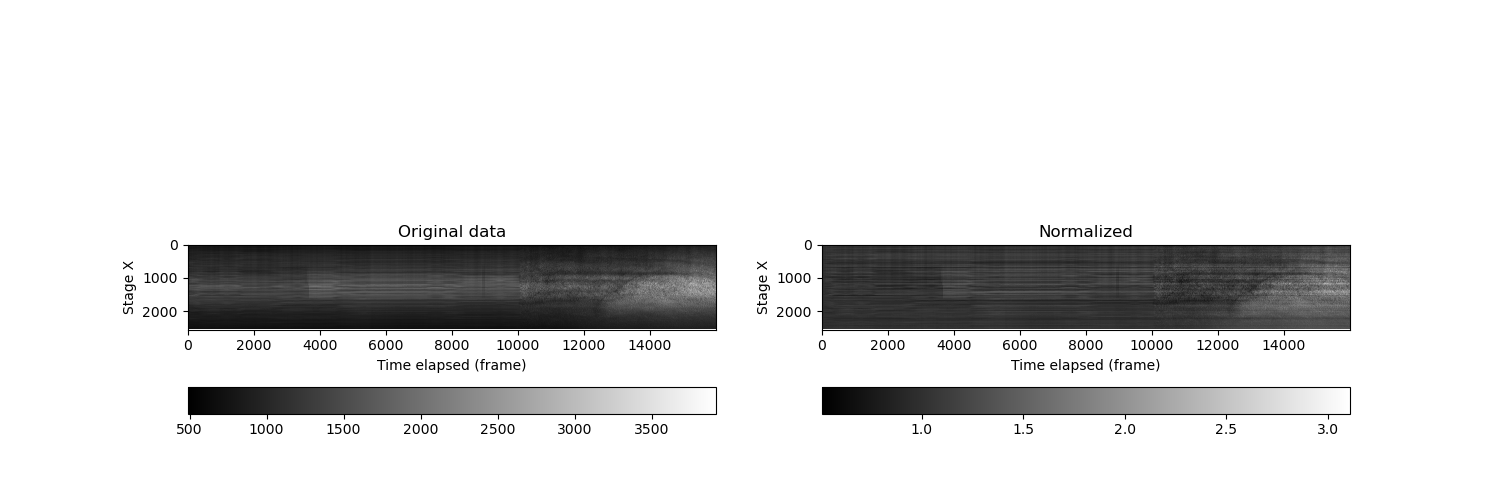

In [35]:
with h5py.File(file_path, 'r') as file:
    show_sino(1500, file)

### Look at raw data (can also use HDFView)

Tomography data consists of forward projection images over an angular range of usually 180 degrees


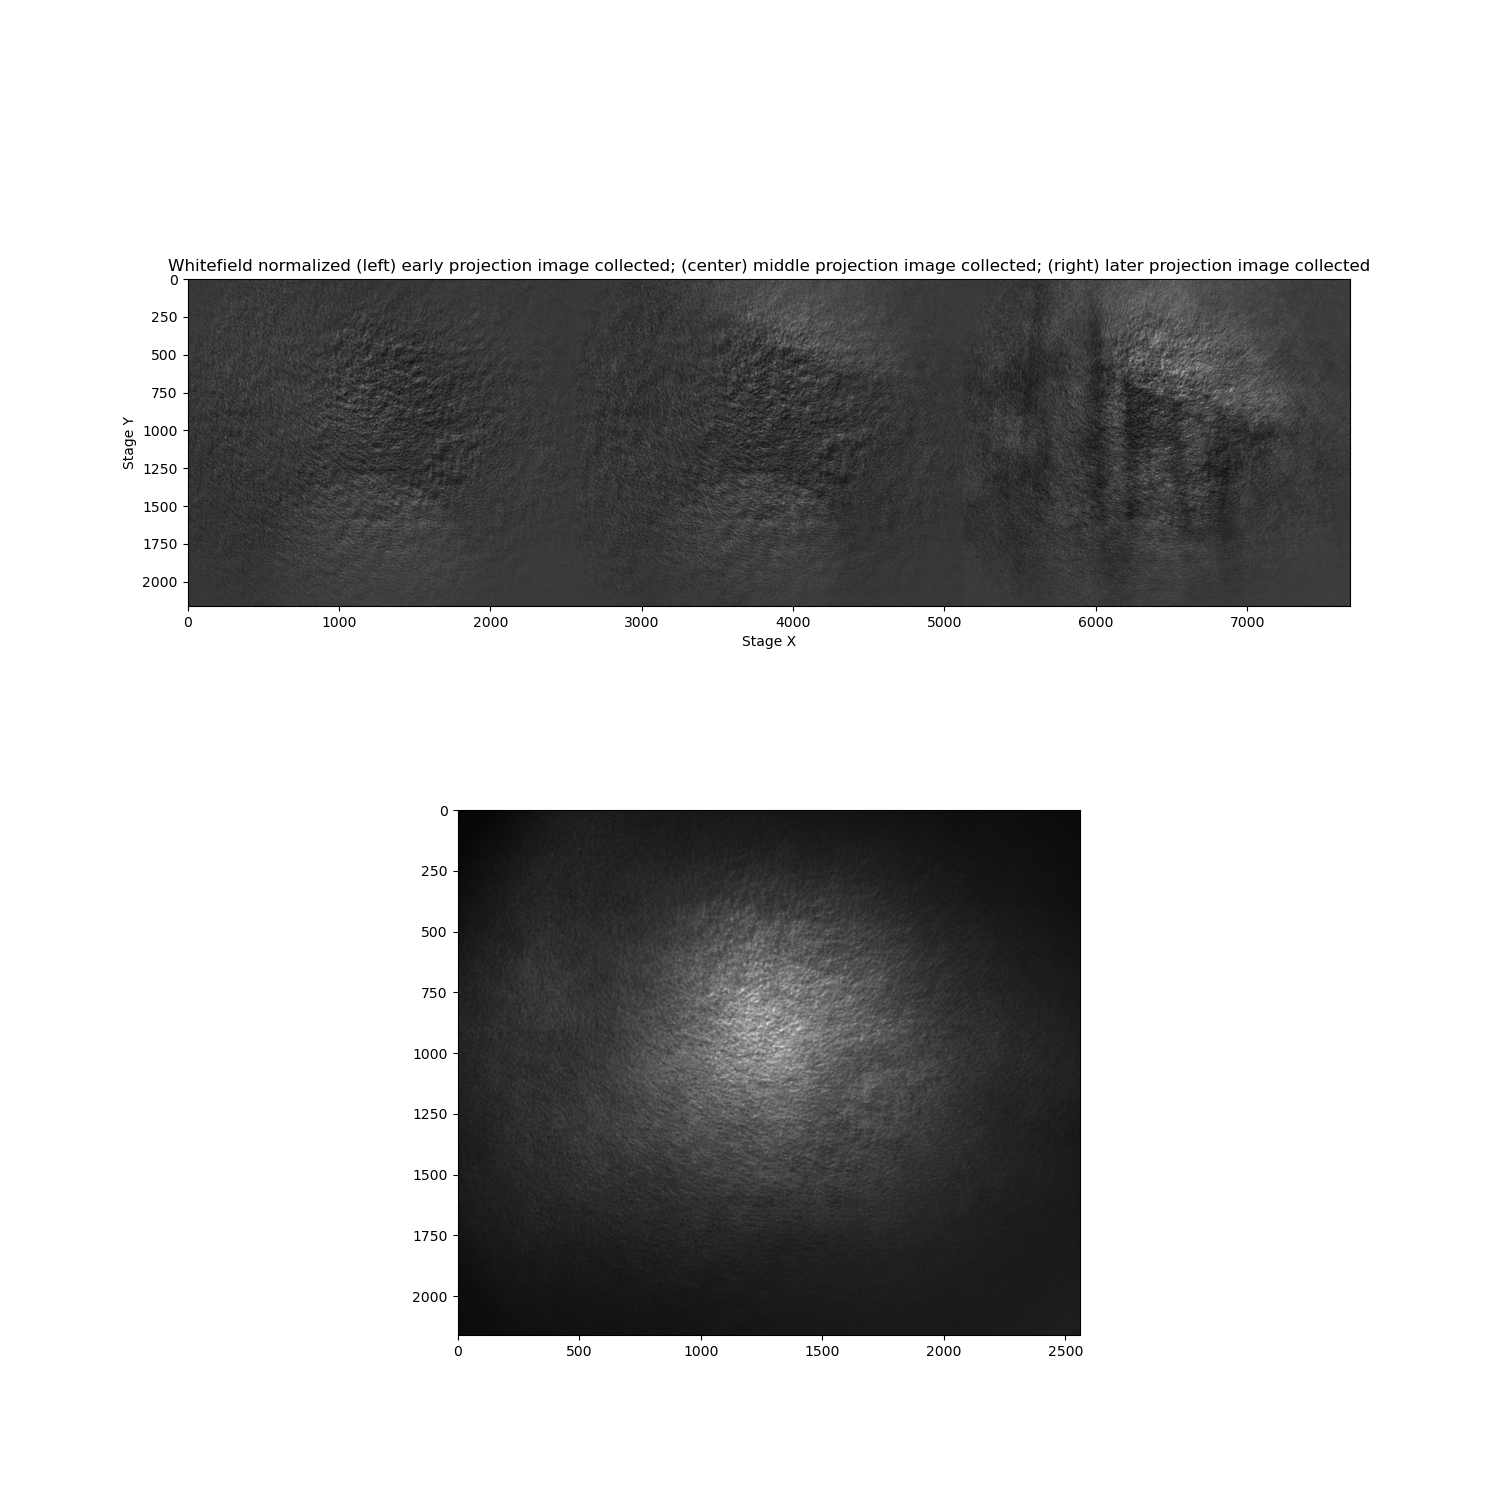

In [64]:
with h5py.File(file_path, 'r') as file:
    first_prj = file["img_radiography"][5000,:,:]
    mid_prj = file["img_radiography"][9000,:,:]
    last_prj = file["img_radiography"][11000,:,:]

    #white_prj = file["img_bkg_avg"]
    white_prj = file["img_radiography"][100,:,:]
    dark_prj = file["img_dark_avg"]

    # Montage
    prj_images = np.concatenate((np.divide(first_prj,white_prj),np.divide(mid_prj,white_prj),np.divide(last_prj,white_prj)), axis=1)
    fig, axs = plt.subplots(2,1,figsize=(15, 15))
    #plt.figure(figsize = (30,15))
    axs[0].set_title('Whitefield normalized (left) early projection image collected; (center) middle projection image collected; (right) later projection image collected')
    axs[0].imshow(np.squeeze(prj_images), cmap = 'gray') #squeeze(), removes axis of size 1
    axs[0].set_xlabel("Stage X")
    axs[0].set_ylabel("Stage Y")
    
    axs[1].imshow(np.squeeze(white_prj), cmap = 'gray') 
    

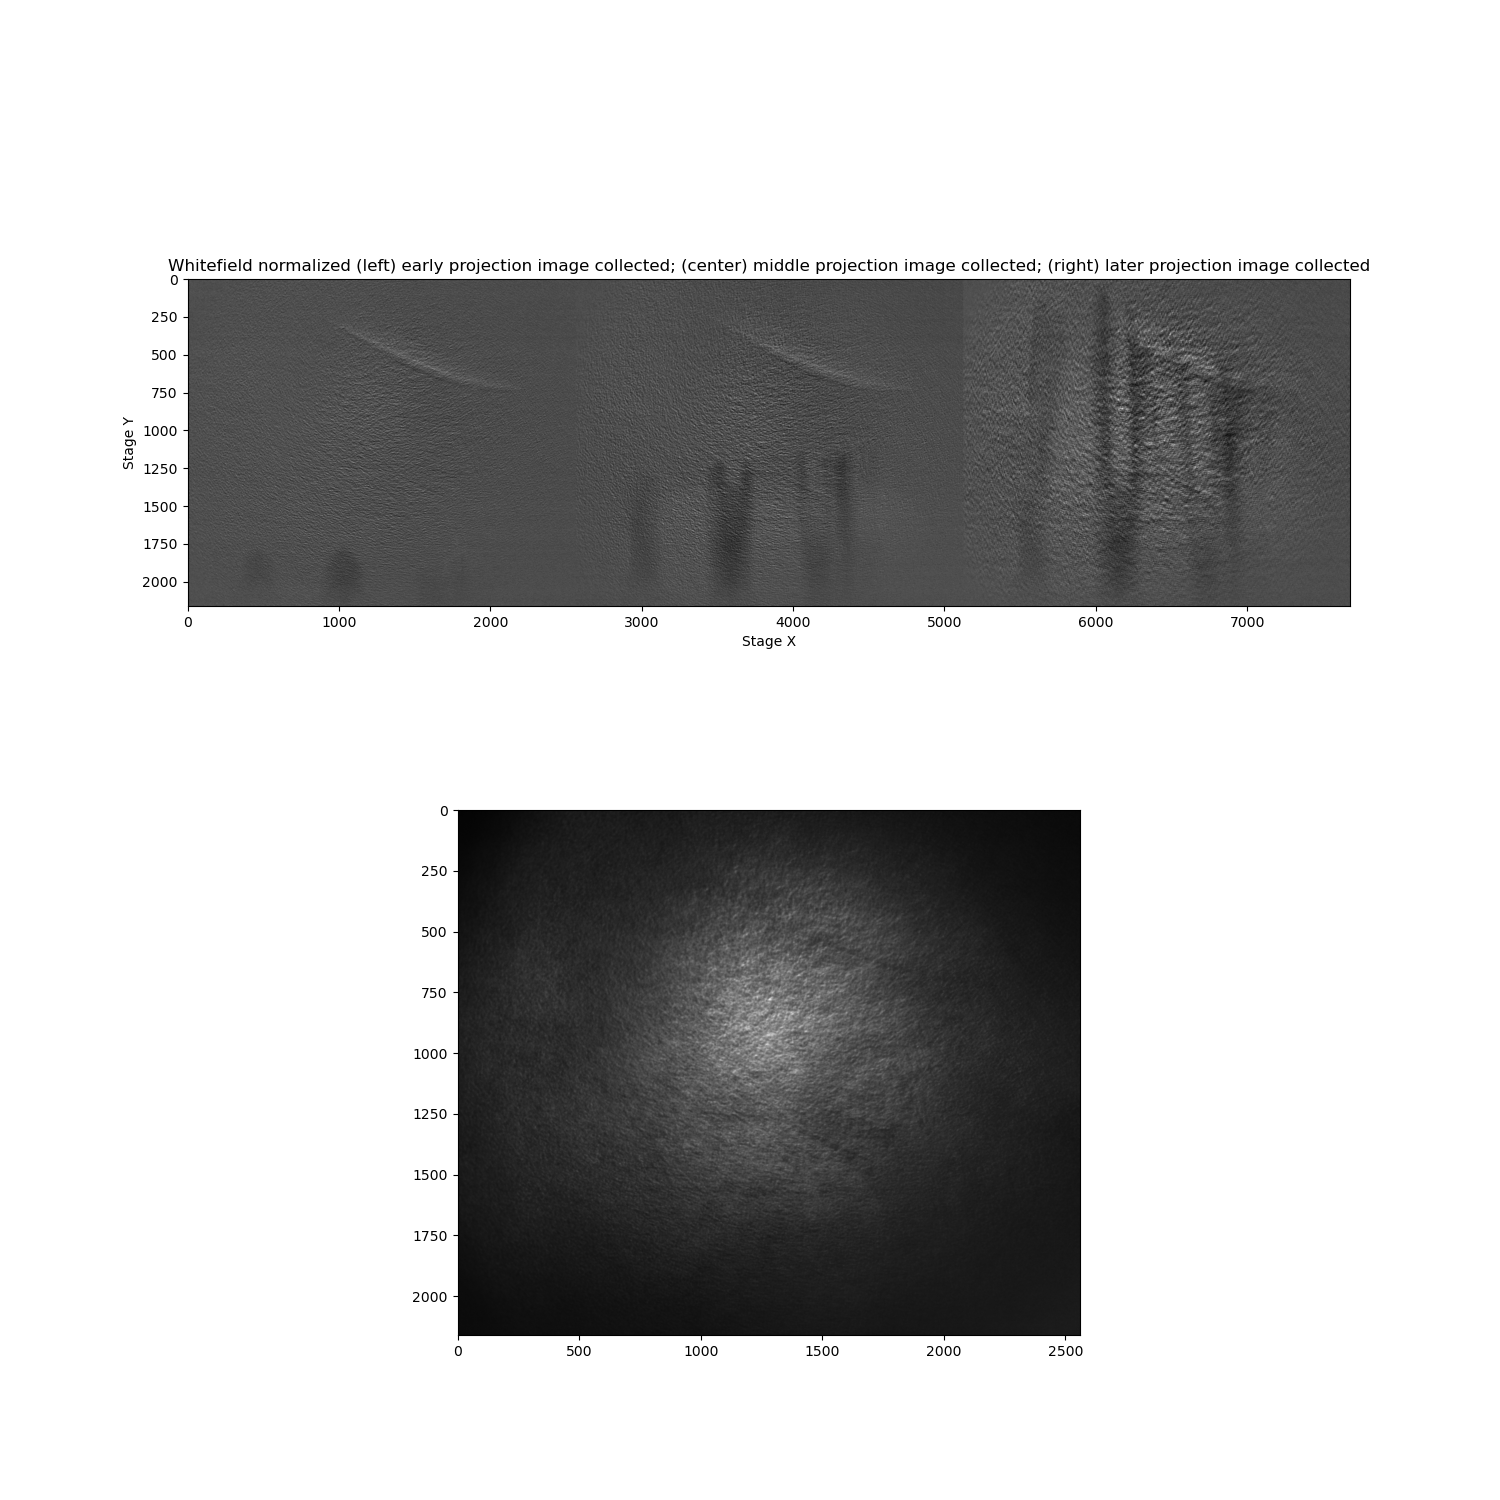

In [65]:
with h5py.File(file_path, 'r') as file:
    first_prj = file["img_radiography"][9500,:,:]
    mid_prj = file["img_radiography"][10050,:,:]
    last_prj = file["img_radiography"][10150,:,:]

    #white_prj = file["img_bkg_avg"]
    white_prj = file["img_radiography"][9000,:,:]
    dark_prj = file["img_dark_avg"]

    # Montage
    prj_images = np.concatenate((np.divide(first_prj,white_prj),np.divide(mid_prj,white_prj),np.divide(last_prj,white_prj)), axis=1)
    fig, axs = plt.subplots(2,1,figsize=(15, 15))
    #plt.figure(figsize = (30,15))
    axs[0].set_title('Whitefield normalized (left) early projection image collected; (center) middle projection image collected; (right) later projection image collected')
    axs[0].imshow(np.squeeze(prj_images), cmap = 'gray') #squeeze(), removes axis of size 1
    axs[0].set_xlabel("Stage X")
    axs[0].set_ylabel("Stage Y")
    
    axs[1].imshow(np.squeeze(white_prj), cmap = 'gray') 

## Export select frames

In [67]:
num_frames = 1400
start_idx = 9000


time_start = time.time()
with h5py.File(file_path, 'r') as file:
    for i in range(start_idx,start_idx+num_frames):
        prj = file["img_radiography"][i,:,:];

        im = Image.fromarray(prj)
        im.save("3823_raw_export/radiography_frame_" + "{:04d}".format(i) + ".tif")


time_end  = time.time()
print(' *** export done in ' + str(round((time_end-time_start)/60,2)) + ' minutes')

 *** export done in 1.52 minutes


## Export normalized frames

In [58]:
num_frames = 1200
start_idx = 9000

time_start = time.time()

with h5py.File(file_path, 'r') as file:
    bkg = file["img_radiography"][start_idx-1,:,:];

    for i in range(start_idx,start_idx+num_frames):
        prj = file["img_radiography"][i,:,:];

        im = Image.fromarray(prj/bkg)
        im.save("3823_norm_sel_export/radiography_frame_" + "{:04d}".format(i) + ".tif")


time_end  = time.time()
print(' *** export done in ' + str(round((time_end-time_start)/60,2)) + ' minutes')

 *** export done in 3.19 minutes
